GEOMETRIC DISTRIBUTION

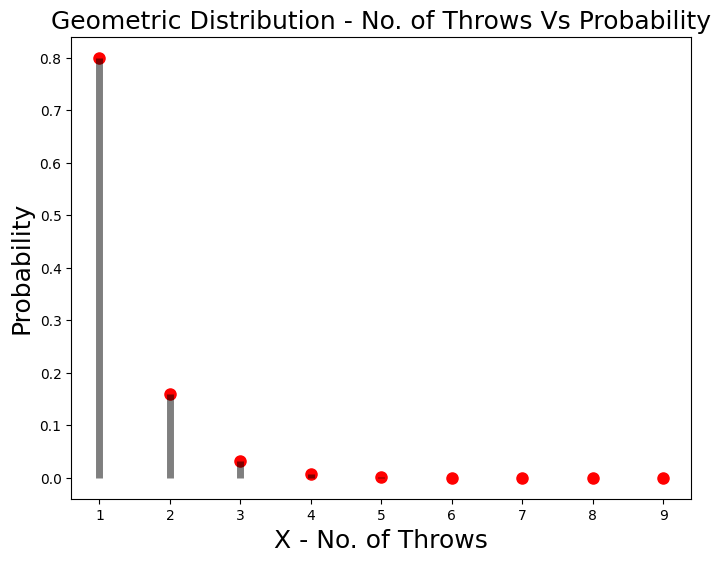

In [1]:
from scipy.stats import geom
import matplotlib.pyplot as plt
X = [1, 2, 3, 4, 5, 6, 7, 8, 9] 
p = 0.8
geom_pd = geom.pmf(X, p)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(X, geom_pd, 'ro', ms=8, label='geom pmf') 
plt.ylabel("Probability", fontsize="18")
plt.xlabel("X - No. of Throws", fontsize="18") 
plt.title("Geometric Distribution - No. of Throws Vs Probability", fontsize="18")
ax.vlines(X, 0, geom_pd, colors='black', lw=5, alpha=0.5)

POISSON DISTRIBUTION

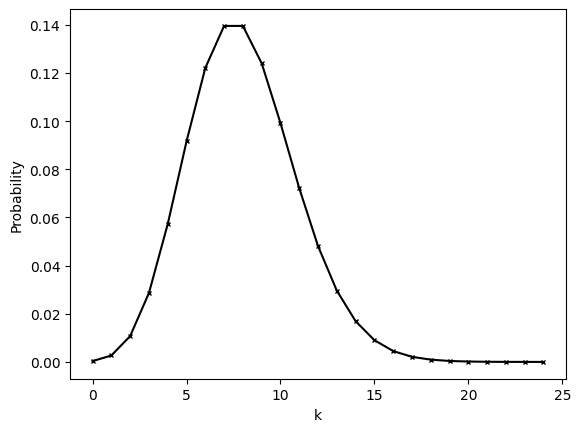

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
k = np.arange(0, 25)
pmf = poisson.pmf(k, mu=8)
pmf = np.round(pmf, 5) 
plt.plot(k, pmf, marker='x',color='black',ms=3.5)
plt.xlabel('k')
plt.ylabel('Probability')
plt.show()

NORMAL DISTRIBUTION

Text(0, 0.5, 'Probability Density')

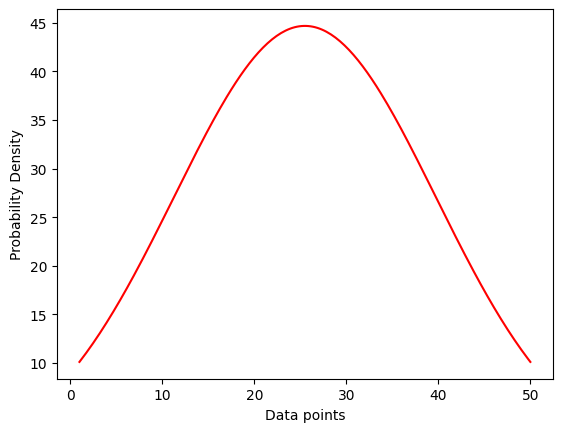

In [5]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(1,50,200)
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density
mean = np.mean(x)
sd = np.std(x)
pdf = normal_dist(x,mean,sd)
plt.plot(x,pdf , color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

EXPONENTIAL DISTRIBUTION

(array([1.60595236e-02, 5.95066361e-03, 2.23776891e-03, 8.66034993e-04,
        3.00962515e-04, 1.13628705e-04, 3.27578248e-05, 2.35446866e-05,
        5.11841012e-06, 2.04736405e-06]),
 array([8.53935167e-04, 3.90754875e+01, 7.81501211e+01, 1.17224755e+02,
        1.56299388e+02, 1.95374022e+02, 2.34448655e+02, 2.73523289e+02,
        3.12597922e+02, 3.51672556e+02, 3.90747190e+02]),
 <BarContainer object of 10 artists>)

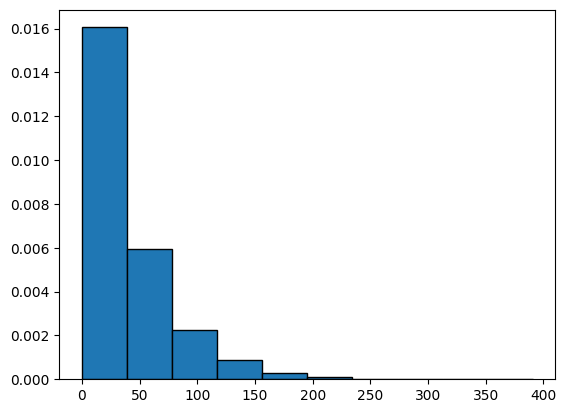

In [7]:
from scipy.stats import expon
import matplotlib.pyplot as plt
x = expon.rvs(scale=40, size=25000)
plt.hist(x, density=True, edgecolor='black')

MAXIMUM LIKELIHOOD

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize
x = np.linspace(-10, 30, 100)
e = np.random.normal(10, 5, 100)
y = 10 + 4*x + e
df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,-10.000000,-15.260494
1,-9.595960,-16.809845
2,-9.191919,-20.526907
3,-8.787879,-15.069573
4,-8.383838,-8.537683


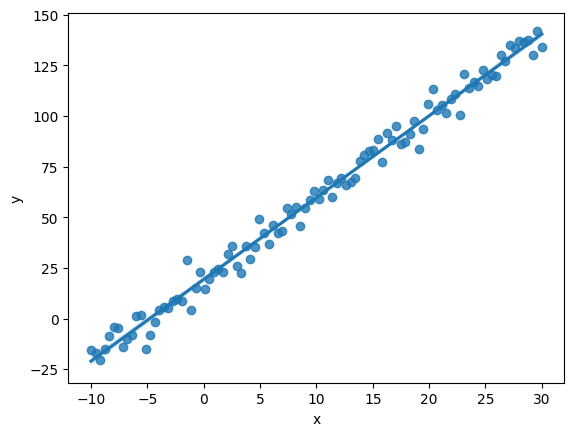

In [9]:
sns.regplot(x='x', y='y', data = df)
plt.show()

In [10]:
features = api.add_constant(df.x)
model = api.OLS(y, features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     8048.
Date:                Sun, 30 Jul 2023   Prob (F-statistic):           6.94e-96
Time:                        11:34:35   Log-Likelihood:                -306.70
No. Observations:                 100   AIC:                             617.4
Df Residuals:                      98   BIC:                             622.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.3896      0.692     28.039      0.000      18.017      20.762
x              4.0381      0.045     89.711      0.000       3.949       4.127
==============================================================================
Omnibus:                        0.815   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.665   Jarque-Bera (JB):                0.365
Skew:                          -0.034   Prob(JB):                        0.833
Kurtosis:                       3.288   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
def MLE_Norm(parameters):
    const, beta, std_dev = parameters
    pred = const + beta*x
    LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
    neg_LL = -1*LL
    return neg_LL
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 306.7021071345011
        x: [ 1.939e+01  4.038e+00  5.197e+00]
      nit: 37
      jac: [-3.411e-05  1.353e-03  5.684e-06]
     nfev: 256
     njev: 64
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

CENTRAL LIMIT THEOREM

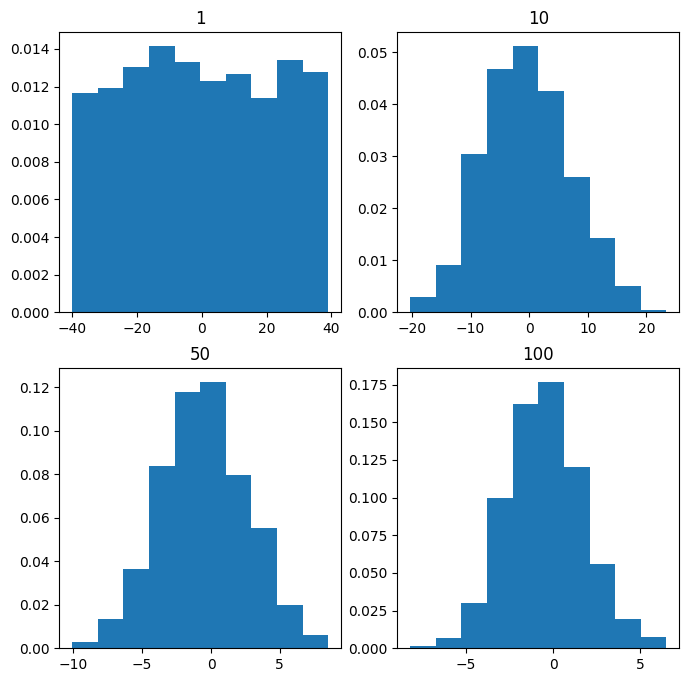

In [20]:
import numpy
import matplotlib.pyplot as plt
num = [1, 10, 50, 100]
means = []
for j in num:
    numpy.random.seed(1)
    x = [numpy.mean(
    numpy.random.randint(-40, 40, j)) for _i in range(1000)]
    means.append(x)
k = 0
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
    for j in range(0, 2):
        ax[i, j].hist(means[k], 10, density = True)
        ax[i, j].set_title(label = num[k])
        k = k + 1
plt.show()

LINEAR REGRESSION

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
X = [12,16,71,99,45,27,80,58,4,50]
Y = [56,22,37,78,83,55,70,94,12,40]
mean_x = np.mean(X)
mean_y = np.mean(Y)
n = len(X)
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)
print(m,c)

0.4950512786062968 31.828630928389092


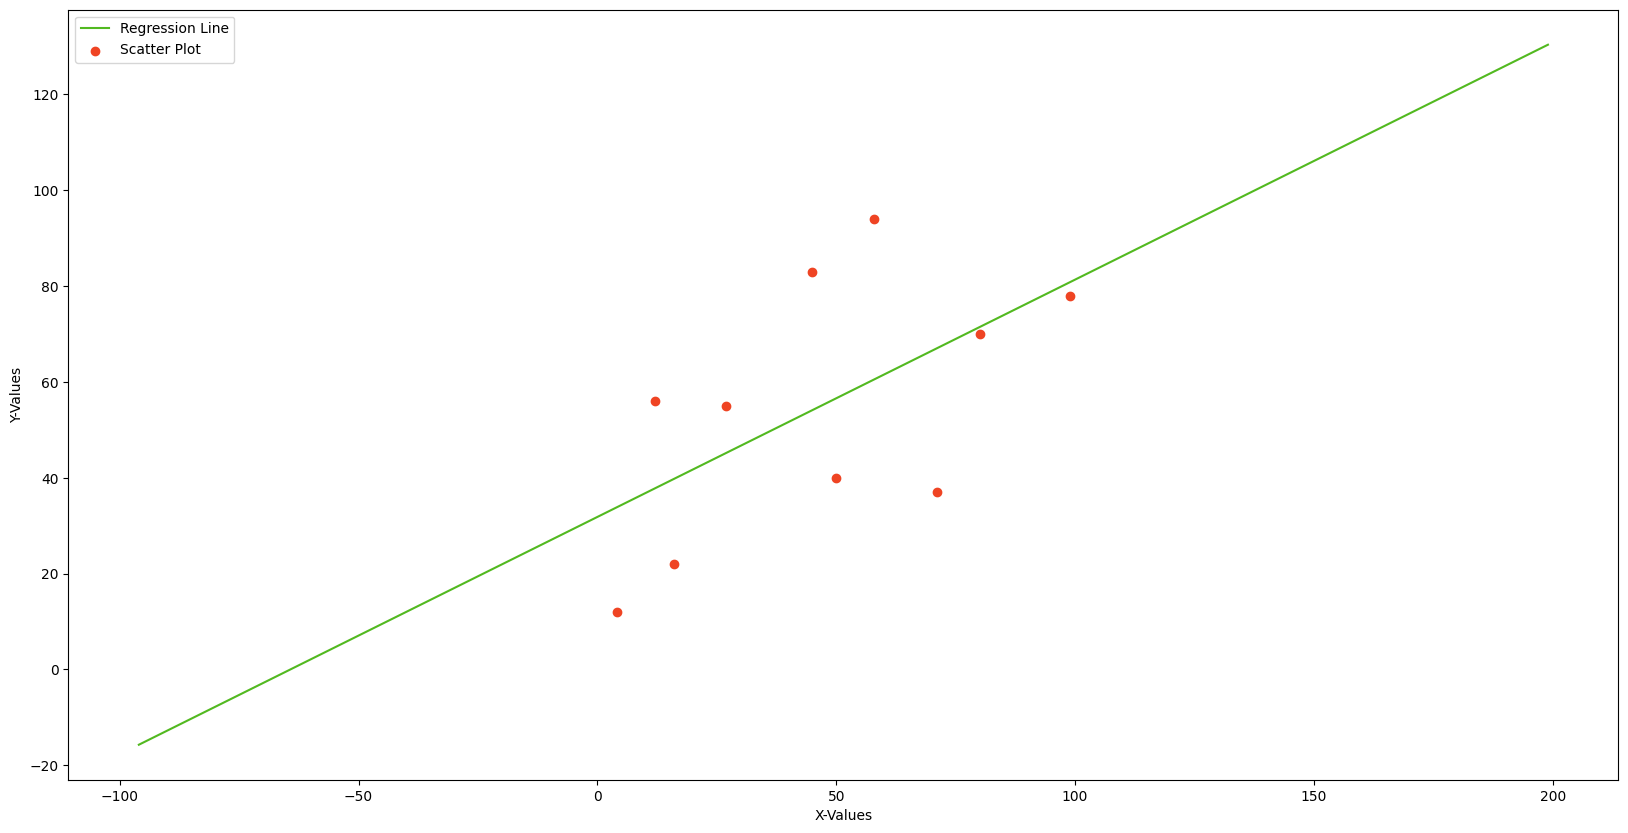

In [23]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(min_x, max_x, 1000)
y = c + m * x
plt.plot(x, y, color='#52b920', label='Regression Line')
plt.scatter(X, Y, c='#ef4423', label='Scatter Plot')
plt.xlabel('X-Values')
plt.ylabel('Y-Values')
plt.legend()
plt.show()

In [25]:
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = c + m * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2

r2 = (ss_r/ss_t)
print(r2)

0.6656148342546553
